# 認知症患者との会話を対象とした共起表現ネットワーク作成
<h3>目標：認知症患者が使う語彙・フレーズを特徴を見つけたい。</h3>
<h3>対象：認知症患者(女性、74才)との会話</h3>

<h4>課題：データのクリーニング(動詞や指示語を消す)</h4>
　　　<h4>健常者の対話文も分析する</h4>
   　 <h4>ネットワーク解析</h4>

<h2>ライブラリ読み込み</h2>

In [4]:
!pip install neologdn

     |████████████████████████████████| 61kB 1.9MB/s eta 0:00:01


In [8]:
import neologdn

In [1]:
import MeCab
import sys
import pandas as pd
import re
import csv
from pathlib import Path
import itertools
import collections
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 日本語フォント読み込み

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

# <h1>データ読み込み</h1>

In [23]:
m = MeCab.Tagger()
termFreq = {}
f = open('dimentia#1.txt')
data1 = f.read()  # ファイル終端まで全て読んだデータを返す
f.close()
print(type(data1)) # 文字列データ
lines1 = data1.split('\n') # 改行で区切る(改行文字そのものは戻り値のデータには含まれない)
print(lines1)

<class 'str'>
['うん。', 'うんうん。', 'うんうちがある。', 'ん。', '明日上がるんねえ小さいぞって見てたん。', 'お母さんそうですね。', 'うん小さいかうんうんうんうんうんみんなの前であれしていた。', 'いやそんなにそう言われてちゃんなん。', '本当にちっちゃいと思う。', '凄く。', '若い頃美人だったでしょう。', 'する余裕。', '秘密。', 'お昼ご飯食べた。', 'うん食べたよってそんなに食べてんけどうんうんちょっと貯めたそれで。', 'うん。', 'もらったのでらしい。', 'んですか売れるって起きるんおやつがずっと出たら今年たんと以内にありますか。', 'うん。', 'センス三時になったらおやつで。', 'この事件なん。', 'はい。', 'はいそんなに好きなんでなかったら。', 'うん。', '好きなんたら。', 'うん。', 'そんなに言うほどではないサッカーうんちょっと食べたらそれではうん。', '好きな食べ物ありますか。', '好きな食べ物。', 'はい。', 'もういつももらうやったら。', '何はい。', '五群は令和。', 'はずはい旦那が安易なお饅頭長根。', '和菓子が好きってこと。', 'うんしないですよねうん付けてパンと食べられへんやろうしますよねうんそもそも二つあったら三十分からねえ。', 'もんじゃ。', 'んじゃそれで他のものはそんなにうんまんじゅうますからね今そんなんちょっとわかった。', 'そうなったん買ってる診察料は。', '大津波にちょうど夜はうん。', '三時寝ちゃうのもあったんですよ。', '五時半からまた何かあったらですよね全然そんなにあげようかってなあ。', 'お昼ご飯食べてからあらゆるちゃったとしてもうん三時にさ何か何か食べられるん。', '油で妨げられん。', 'うちのスタッフが見たことない。', 'よね。', 'うん。', 'そんなのうんやめたことないなあと思うん。', 'お姉ちゃんはね。', 'うんちゃん頻繁に。', '頻繁に来てる。', 'そうかそうか。', 'うん。', 'うんうん。', 'うんうちがあるん。', '明日上がるんねえ小さいぞって見てたん。', 'お母さんそうですね。', 'うん小さいかうんうんうん。', 'うん。', 'うんみんなの前であれ

# 前処理

In [24]:
sentences = []
i=0
for line in lines1:
    print(i)
    i+=1
    line.strip()
    docs = m.parse(line)
    docs = docs.split('\n')
    items = (re.split('[\t,]', doc) for doc in docs)
    words = ([item[0]
         for item in items
         if (item[0] not in ('EOS', '', 't', 'ー', '、', '。', 'うん', 'ん') and item[1] != '助詞')])
    ngram_list = ([(words[i], words[i+1]) for i in range(len(words)-1)])
    if ngram_list == []:
        continue
    print(ngram_list)
    for n_word in ngram_list:
        if n_word in termFreq:
            termFreq[n_word] += 1
        else:
            termFreq[n_word] = 1
            
#     for word in words:
#         if word in termFreq:
#             termFreq[word] += 1
#         else:
#             termFreq[word] = 1
            
    sentences.append(words)
    
sentences = [sentence for sentence in sentences if len(sentence) > 1]
sentence_combinations = [list(itertools.combinations(sentence, 2)) for sentence in sentences]
sentence_combinations = [[tuple(sorted(words)) for words in sentence] for sentence in sentence_combinations]
print('単語の組合せ')
for combinations in sentence_combinations[:20]:
    print(combinations)
    

0
1
2
[('うち', 'ある')]
3
4
[('明日', '上がる'), ('上がる', 'え'), ('え', '小さい'), ('小さい', '見'), ('見', 'たん')]
5
[('お母さん', 'そう'), ('そう', 'です')]
6
[('小さい', 'みんな'), ('みんな', '前'), ('前', 'あれ'), ('あれ', 'し'), ('し', 'い'), ('い', 'た')]
7
[('いや', 'そんなに'), ('そんなに', 'そう'), ('そう', '言わ'), ('言わ', 'れ'), ('れ', 'ちゃん'), ('ちゃん', 'な')]
8
[('本当に', 'ちっちゃい'), ('ちっちゃい', '思う')]
9
10
[('若い', '頃'), ('頃', '美人'), ('美人', 'だっ'), ('だっ', 'た'), ('た', 'でしょ'), ('でしょ', 'う')]
11
[('する', '余裕')]
12
13
[('お昼', 'ご飯'), ('ご飯', '食べ'), ('食べ', 'た')]
14
[('食べ', 'た'), ('た', 'そんなに'), ('そんなに', '食べ'), ('食べ', 'ちょっと'), ('ちょっと', '貯め'), ('貯め', 'た'), ('た', 'それ')]
15
16
[('もらっ', 'た'), ('た', 'の'), ('の', 'で'), ('で', 'らしい')]
17
[('です', '売れる'), ('売れる', '起きる'), ('起きる', 'お'), ('お', 'やつ'), ('やつ', 'ずっと'), ('ずっと', '出'), ('出', 'たら'), ('たら', '今年'), ('今年', 'たんと'), ('たんと', '以内'), ('以内', 'あり'), ('あり', 'ます')]
18
19
[('センス', '三'), ('三', '時'), ('時', 'なっ'), ('なっ', 'たら'), ('たら', 'お'), ('お', 'やつ')]
20
[('この', '事件'), ('事件', 'な')]
21
22
[('はい', 'そんなに'), ('そんなに', '好き'), ('好き', 'な'

[('暇', 'ない')]
460
461
462
[('何', 'やり'), ('やり', 'たい'), ('たい', 'こと'), ('こと', 'ない')]
463
[('何', '自分'), ('自分', '何')]
464
[('ほんとに', '何'), ('何', 'やってき'), ('やってき', 'た')]
465
466
[('どっか', '旅行')]
467
468
469
[('どこ', '例えば')]
470
471
472
[('そんな', '色'), ('色', 'いから')]
473
[('何', 'いい'), ('いい', 'い'), ('い', 'です')]
474
475
[('勝手', '人'), ('人', '楽しい'), ('楽しい', '旅行')]
476
477
[('もう', '寝る'), ('寝る', 'だっ'), ('だっ', 'たら'), ('たら', 'こう'), ('こう', 'やっ'), ('やっ', 'はい')]
478
[('いや', 'そう'), ('そう', 'だ'), ('だ', 'はい'), ('はい', 'ない'), ('ない', '旅行'), ('旅行', '行っ'), ('行っ', 'たら'), ('たら', '何'), ('何', '起こる'), ('起こる', '分かん'), ('分かん', 'ない'), ('ない', 'とき'), ('とき', 'ある')]
479
[('あっ', 'たら'), ('たら', 'ます')]
480
[('そうですね', 'はい'), ('はい', '本音'), ('本音', '行っ'), ('行っ', 'たら'), ('たら', '行っ'), ('行っ', 'た')]
481
482
483
[('カナダ', '楽しかっ'), ('楽しかっ', 'た')]
484
[('第', '十'), ('十', '位')]
485
486
[('寒い', 'カナダ')]
487
[('そんな', '寒い'), ('寒い', 'とき')]
488
[('夏', '行っ'), ('行っ', 'た'), ('た', 'じゃ')]
489
490
[('一番', '気持ち'), ('気持ち', 'です')]
491
492
[('そう', 'だ')]
493
[('い

単語の組合せ
[('ある', 'うち')]
[('上がる', '明日'), ('え', '明日'), ('小さい', '明日'), ('明日', '見'), ('たん', '明日'), ('え', '上がる'), ('上がる', '小さい'), ('上がる', '見'), ('たん', '上がる'), ('え', '小さい'), ('え', '見'), ('え', 'たん'), ('小さい', '見'), ('たん', '小さい'), ('たん', '見')]
[('お母さん', 'そう'), ('お母さん', 'です'), ('そう', 'です')]
[('みんな', '小さい'), ('前', '小さい'), ('あれ', '小さい'), ('し', '小さい'), ('い', '小さい'), ('た', '小さい'), ('みんな', '前'), ('あれ', 'みんな'), ('し', 'みんな'), ('い', 'みんな'), ('た', 'みんな'), ('あれ', '前'), ('し', '前'), ('い', '前'), ('た', '前'), ('あれ', 'し'), ('あれ', 'い'), ('あれ', 'た'), ('い', 'し'), ('し', 'た'), ('い', 'た')]
[('いや', 'そんなに'), ('いや', 'そう'), ('いや', '言わ'), ('いや', 'れ'), ('いや', 'ちゃん'), ('いや', 'な'), ('そう', 'そんなに'), ('そんなに', '言わ'), ('そんなに', 'れ'), ('そんなに', 'ちゃん'), ('そんなに', 'な'), ('そう', '言わ'), ('そう', 'れ'), ('そう', 'ちゃん'), ('そう', 'な'), ('れ', '言わ'), ('ちゃん', '言わ'), ('な', '言わ'), ('ちゃん', 'れ'), ('な', 'れ'), ('ちゃん', 'な')]
[('ちっちゃい', '本当に'), ('思う', '本当に'), ('ちっちゃい', '思う')]
[('若い', '頃'), ('美人', '若い'), ('だっ', '若い'), ('た', '若い'), ('でしょ', '若い'), ('う', '若い'), ('

In [5]:
term_list = []
count_list = []
for term, count in termFreq.items():
    term_list.append(term)
    count_list.append(count)

s = pd.DataFrame({
 'Count':count_list,
 'List':term_list
 })

s = s.sort_values('Count', ascending=False)
pd.get_option("display.max_rows", 2000)
s.head(60)

In [6]:
pd.get_option("display.max_rows", 2000)
s.head(60)

,Count,List
63,16,"(好き, な)"
271,15,"(し, てる)"
178,15,"(二, 十)"
400,14,"(て, た)"
439,14,"(結婚, し)"
135,12,"(あっ, た)"
708,12,"(そう, だ)"
501,11,"(楽しかっ, た)"
136,11,"(た, です)"
161,11,"(こと, ない)"


# 単語間の重みを測定
<h2>Jaccard係数=n(A∩B)/n(A∪B)を使う</h2>

In [25]:
target_combinations = []
for sentence in sentence_combinations:
    target_combinations.extend(sentence)

##------------------------------------  Jaccard係数を求める
# Jaccard係数 = n(A ∩ B) / n(A ∪ B)

#  直積の計算（同じ文内にある２つの単語の出現回数を計算）
combi_count = collections.Counter(target_combinations)

#  単語の組合せと出現回数のデータフレームを作る
word_associates = []
for key, value in combi_count.items():
    word_associates.append([key[0], key[1], value])

word_associates = pd.DataFrame(word_associates, columns=['word1', 'word2', 'intersection_count'])

#  和集合の計算 n(A ∪ B) = n(A) + n(B) - n(A ∩ B) を利用
#  それぞれの単語の出現回数を計算
target_words = []
for word in target_combinations:
    target_words.extend(word)

word_count = collections.Counter(target_words)
word_count = [[key, value] for key, value in word_count.items()]
word_count = pd.DataFrame(word_count, columns=['word', 'count'])

#  単語の組合せの出現回数のデータにそれぞれの単語の出現回数を結合
word_associates = pd.merge(word_associates, word_count, left_on='word1', right_on='word', how='left')
word_associates.drop(columns=['word'], inplace=True)
word_associates.rename(columns={'count': 'count1'}, inplace=True)
word_associates = pd.merge(word_associates, word_count, left_on='word2', right_on='word', how='left')
word_associates.drop(columns=['word'], inplace=True)
word_associates.rename(columns={'count': 'count2'}, inplace=True)

word_associates['union_count'] = word_associates['count1'] + word_associates['count2'] - word_associates['intersection_count']
word_associates['jaccard_coefficient'] = word_associates['intersection_count'] / word_associates['union_count']

print('Jaccard係数の算出')
word_associates.head(60)

Jaccard係数の算出


,word1,word2,intersection_count,count1,count2,union_count,jaccard_coefficient
0,ある,うち,2,132,57,187,0.010695
1,上がる,明日,2,10,59,67,0.029851
2,え,明日,2,206,59,263,0.007605
3,小さい,明日,2,20,59,77,0.025974
4,明日,見,2,59,52,109,0.018349
5,たん,明日,2,25,59,82,0.024390
6,え,上がる,2,206,10,214,0.009346
7,上がる,小さい,2,10,20,28,0.071429
8,上がる,見,2,10,52,60,0.033333
9,たん,上がる,2,25,10,33,0.060606


In [26]:
word_associates['count1'].mean()

221.84470395410776

   group_number  word2
0             0   2339
1             1   2786
2             2   1417
3             3    954
4             4   2266



/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


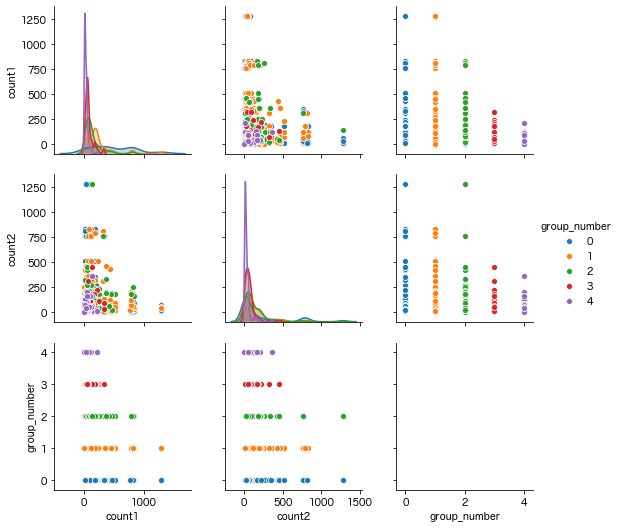

In [21]:
jaccard_coefficients = word_associates['jaccard_coefficient']
group_numbers = []
for coefficient in jaccard_coefficients:
    if coefficient < 0.003:
        group_numbers.append(0)
    elif coefficient < 0.006:
        group_numbers.append(1)
    elif coefficient < 0.009:
        group_numbers.append(2)
    elif coefficient < 0.012:
        group_numbers.append(3)
    else:
        group_numbers.append(4)
word_associates['group_number'] = group_numbers

word_associates_group_sum = word_associates.groupby('group_number').count()
word_associates_group_sum.reset_index(inplace=True)
print(word_associates_group_sum.loc[:, ['group_number', 'word2']])
print('')

sns.pairplot(hue='group_number', data=word_associates.sample(800).loc[:, ['count1', 'count2', 'group_number']])
# plt.savefig(image_dir_path.joinpath(base_file_name+'_jaccard_group_plot.png'))

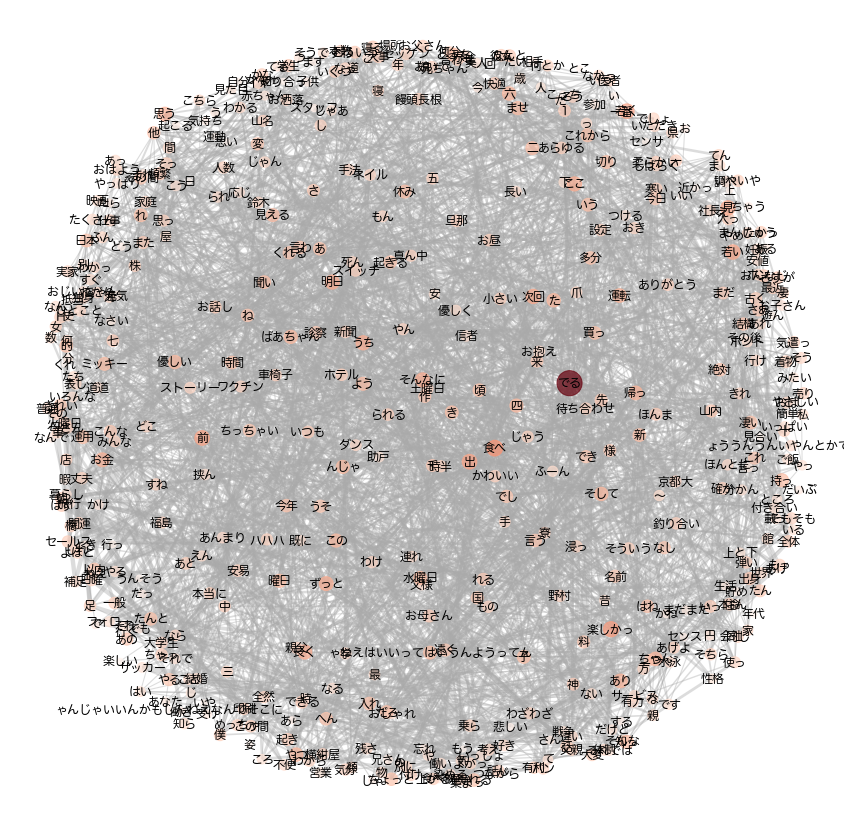

In [22]:
n_word_lower = 10
edge_threshold = 0.01

word_associates.query('count1 >= @n_word_lower & count2 >= @n_word_lower', inplace=True)
word_associates.rename(columns={'word1':'node1', 'word2':'node2', 'jaccard_coefficient':'value'}, inplace=True)

##  共起ネットワークを表示する関数
def plot_network(data, edge_threshold=0., fig_size=(15, 15), file_name=None, dir_path=None):

    nodes = list(set(data['node1'].tolist()+data['node2'].tolist()))

    G = nx.Graph()
    #  頂点の追加
    G.add_nodes_from(nodes)

    #  辺の追加
    #  edge_thresholdで枝の重みの下限を定めている
    for i in range(len(data)):
        row_data = data.iloc[i]
        if row_data['value'] > edge_threshold:
            G.add_edge(row_data['node1'], row_data['node2'], weight=row_data['value'])

    # 孤立したnodeを削除
    isolated = [n for n in G.nodes if len([i for i in nx.all_neighbors(G, n)]) == 0]
    for n in isolated:
        G.remove_node(n)

    plt.figure(figsize=fig_size)
    pos = nx.spring_layout(G, k=0.3)  # k = node間反発係数

    pr = nx.pagerank(G)

    # nodeの大きさ
    nx.draw_networkx_nodes(G, pos, node_color=list(pr.values()),
                           cmap=plt.cm.Reds,
                           alpha=0.7,
                           node_size=[60000*v for v in pr.values()])

    # 日本語ラベル
    nx.draw_networkx_labels(G, pos, fontsize=14, font_family='Hiragino Maru Gothic Pro', font_weight="bold")

    # エッジの太さ調節
    edge_width = [d["weight"] * 100 for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color="darkgrey", width=edge_width)

    plt.axis('off')

    if file_name is not None:
        if dir_path is None:
            dir_path = Path('.').joinpath('image')
        if not dir_path.exists():
            dir_path.mkdir(parents=True)
        plt.savefig(dir_path.joinpath(file_name), bbox_inches="tight")
        
plot_network(data=word_associates, edge_threshold=edge_threshold)